In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
df2=pd.read_csv('Documents/Flipkart_orders.csv')
df2.head()

/var/folders/mj/r3dfln1d2zjb146r3_q0z8yc0000gn/T/ipykernel_13840/1771705168.py:1: DtypeWarning: Columns (24,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('Documents/Flipkart_orders.csv')


,order_item_id,order_id,fulfilment_source,fulfilment_type,order_date,order_approval_date,order_item_status,sku,fsn,product_title,...,deliver_by_date,order_delivery_date,delivery_sla_breached,order_service_completion_date,service_by_date,service_completion_sla,service_sla_breached,account_id,create_time,update_time
0,OI:12560191039333800,OD125601910393338000,Seller,NON_FBF,2022-07-30 00:00:00,2022-07-30 00:00:00,DELIVERED,STYLUS_PEN,"STSGGHS2XG5RNZHR""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:31:49,2024-01-25 10:31:49
1,OI:12560502154330800,OD125605021543308000,Seller,NON_FBF,2022-07-30 00:00:00,2022-07-30 00:00:00,DELIVERED,STYLUS_PEN,"STSGGHS2XG5RNZHR""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:31:51,2024-01-25 10:31:51
2,OI:12560502154330801,OD125605021543308000,Seller,NON_FBF,2022-08-05 00:00:00,2022-08-05 00:00:00,RETURNED,STYLUS_PEN,"STSGGHS2XG5RNZHR""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:31:51,2024-01-25 10:31:51
3,OI:12561169342802700,OD125611693428027000,Seller,NON_FBF,2022-07-31 00:00:00,2022-07-31 00:00:00,DELIVERED,STYLUS_PEN_BLACK,"STSGGZFCFY2TX4GF""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:30:18,2024-01-25 10:30:18
4,OI:12561404691585900,OD125614046915859000,Seller,NON_FBF,2022-07-31 00:00:00,2022-07-31 00:00:00,DELIVERED,STYLUS_PEN,"STSGGHS2XG5RNZHR""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:31:48,2024-01-25 10:31:48


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83667 entries, 0 to 83666
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   order_item_id                     83667 non-null  object 
 1   order_id                          83667 non-null  object 
 2   fulfilment_source                 83615 non-null  object 
 3   fulfilment_type                   83667 non-null  object 
 4   order_date                        83667 non-null  object 
 5   order_approval_date               83243 non-null  object 
 6   order_item_status                 83667 non-null  object 
 7   sku                               83667 non-null  object 
 8   fsn                               83667 non-null  object 
 9   product_title                     83667 non-null  object 
 10  order_quantity                    83667 non-null  int64  
 11  serial_no_imei                    0 non-null      float64
 12  deli

In [9]:
df2.isna().sum()

order_item_id                           0
order_id                                0
fulfilment_source                      52
fulfilment_type                         0
order_date                              0
order_approval_date                   424
order_item_status                       0
sku                                     0
fsn                                     0
product_title                           0
order_quantity                          0
serial_no_imei                      83667
delivery_logistics_partner          83667
pickup_logistics_partner             3993
delivery_tracking_id                10764
forward_logistics_form              83667
forward_logistics_form_no           83667
order_cancellation_date             75024
cancellation_reason                 83667
cancellation_sub_reason             83667
order_return_approval_date          71712
return_id                           71667
return_reason                       71667
return_sub_reason                 

In [11]:
columns_to_drop2 = [
    'serial_no_imei',
    'delivery_logistics_partner',
    'forward_logistics_form',
    'forward_logistics_form_no',
    'order_cancellation_date',
    'cancellation_reason',
    'cancellation_sub_reason',
    'order_return_approval_date',
    'return_id',
    'return_reason',
    'return_sub_reason',
    'order_service_completion_date',
    'service_by_date',
    'service_completion_sla',
    'service_sla_breached',
    'order_item_id',
    'order_id',
    'delivery_tracking_id'
    
    
]
df2.drop(columns=columns_to_drop2, inplace=True)

columns_to_check_null2 = [
    'fulfilment_source',
    'order_approval_date',
    'pickup_logistics_partner',
    'procurement_dispatch_sla',
    'dispatch_after_date',
    'dispatch_by_date',
    'dispatch_sla_breached',
    'seller_pickup_reattempts',
    'delivery_sla',
    'deliver_by_date',
    'delivery_sla_breached'
    
]
df2.dropna(subset=columns_to_check_null2, inplace=True)


In [13]:
df2.shape

(79231, 24)

In [15]:
categorical_columns = [
    'fulfilment_source', 'fulfilment_type', 'order_item_status',
    'sku', 'fsn', 'product_title', 'pickup_logistics_partner',
    'dispatch_sla_breached', 'seller_pickup_reattempts',
    'delivery_sla_breached'
]
for col in categorical_columns:
    df2[col] = df2[col].astype('category')
datetime_columns = [
    'order_date', 'order_approval_date', 'dispatch_after_date',
    'dispatch_by_date', 'order_ready_for_dispatch_on_date',
    'dispatched_date', 'deliver_by_date', 'order_delivery_date',
    'create_time', 'update_time']
for col in datetime_columns:
    df2[col] = pd.to_datetime(df2[col], errors='coerce')


numeric_columns = ['order_quantity', 'procurement_dispatch_sla', 'delivery_sla']
for col in numeric_columns:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 79231 entries, 606 to 83666
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   fulfilment_source                 79231 non-null  category      
 1   fulfilment_type                   79231 non-null  category      
 2   order_date                        79231 non-null  datetime64[ns]
 3   order_approval_date               79231 non-null  datetime64[ns]
 4   order_item_status                 79231 non-null  category      
 5   sku                               79231 non-null  category      
 6   fsn                               79231 non-null  category      
 7   product_title                     79231 non-null  category      
 8   order_quantity                    79231 non-null  int64         
 9   pickup_logistics_partner          79231 non-null  category      
 10  procurement_dispatch_sla          79231 non-null 

In [17]:
df2.columns


Index(['fulfilment_source', 'fulfilment_type', 'order_date',
       'order_approval_date', 'order_item_status', 'sku', 'fsn',
       'product_title', 'order_quantity', 'pickup_logistics_partner',
       'procurement_dispatch_sla', 'dispatch_after_date', 'dispatch_by_date',
       'order_ready_for_dispatch_on_date', 'dispatched_date',
       'dispatch_sla_breached', 'seller_pickup_reattempts', 'delivery_sla',
       'deliver_by_date', 'order_delivery_date', 'delivery_sla_breached',
       'account_id', 'create_time', 'update_time'],
      dtype='object')

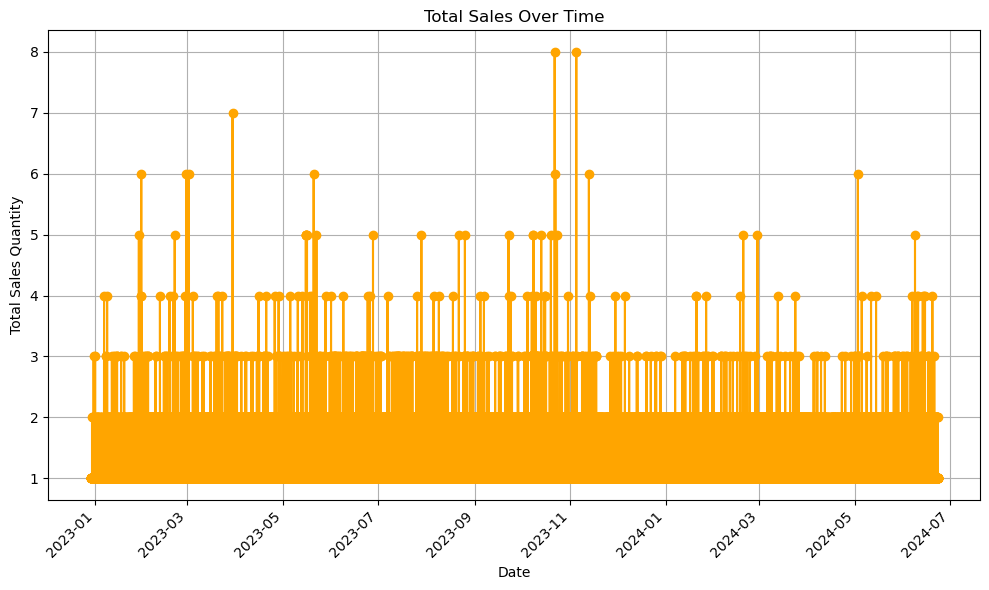

In [19]:
# Sales Trends Over Time
sales_over_time = df2.groupby('order_date')['order_quantity'].sum()

plt.figure(figsize=(10, 6))
sales_over_time.plot(kind='line', color='orange', marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


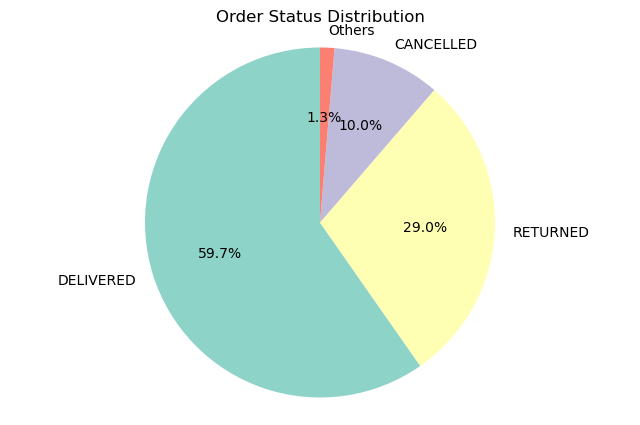

In [25]:
# Order Status Distribution (Top 3 and Others)
order_status_counts = df2['order_item_status'].value_counts()

# Separate top 3 order statuses and group the rest as 'Others'
top_3_status = order_status_counts.nlargest(3)
other_status = pd.Series({'Others': order_status_counts[3:].sum()})

# Combine top 3 and 'Others'
order_status_data = pd.concat([top_3_status, other_status])

# Plot the pie chart
plt.figure(figsize=(8, 5))
plt.pie(order_status_data, labels=order_status_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Order Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


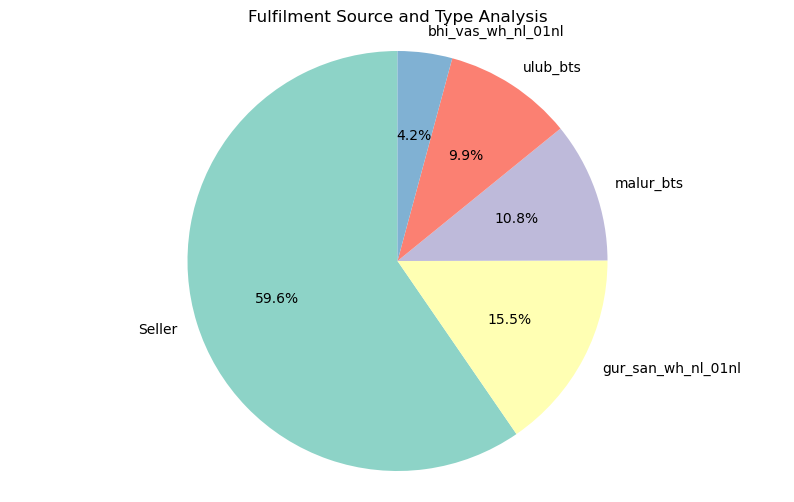

In [11]:
# Fulfilment Source and Type Analysis
fulfilment_counts = df2['fulfilment_source'].value_counts()#

plt.figure(figsize=(10, 6))
plt.pie(fulfilment_counts,labels=fulfilment_counts.index,autopct='%1.1f%%',startangle=90, colors=sns.color_palette("Set3"))
# fulfilment_counts.plot(kind='bar', stacked=True)
plt.title('Fulfilment Source and Type Analysis')
# plt.xlabel('Fulfilment Source')
# plt.ylabel('Number of Orders')
# plt.xticks(rotation=45)
# plt.tight_layout()
plt.axis('equal')
plt.show()


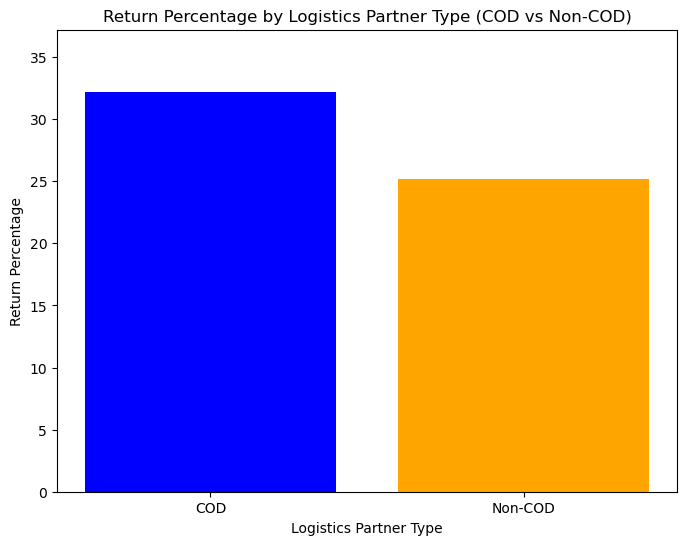

Logistics Partner Type with Highest Return Percentage:
  partner_type  return_percentage
0          COD          32.203228


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize logistics partners
def categorize_partner(partner_name):
    cod_partners = [
        'Delhivery E2E Prepaid',
        'Delhivery Volumetric Lastmile COD',
        'Delhivery Volumetric Lastmile Prepaid',
        'Delivery EZE COD',
        'delhivery-cod',
        'ecom-cod',
        'flipkartlogistics-cod'
    ]
    
    if partner_name in cod_partners:
        return 'COD'
    else:
        return 'Non-COD'

# Apply the categorization to create a new column
df2['partner_type'] = df2['pickup_logistics_partner'].apply(categorize_partner)

# Calculate return percentage by partner type
return_percentage_by_partner = (
    df2[df2['order_item_status'] == 'RETURNED']
    .groupby('partner_type')['order_item_status']
    .count() / df2.groupby('partner_type')['order_item_status']
    .count() * 100
).reset_index(name='return_percentage')

# Plotting the return percentage by partner type
plt.figure(figsize=(8, 6))
plt.bar(return_percentage_by_partner['partner_type'], return_percentage_by_partner['return_percentage'], color=['blue', 'orange'])
plt.xlabel('Logistics Partner Type')
plt.ylabel('Return Percentage')
plt.title('Return Percentage by Logistics Partner Type (COD vs Non-COD)')
plt.ylim(0, return_percentage_by_partner['return_percentage'].max() + 5)
plt.show()

# Identify the partner type with the highest return percentage
best_partner_type = return_percentage_by_partner.sort_values(by='return_percentage', ascending=False).head(1)
print("Logistics Partner Type with Highest Return Percentage:")
print(best_partner_type)


/var/folders/mj/r3dfln1d2zjb146r3_q0z8yc0000gn/T/ipykernel_121/2553971235.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delivery_time = df2.groupby('delivery_sla_breached')['delivery_time'].mean()


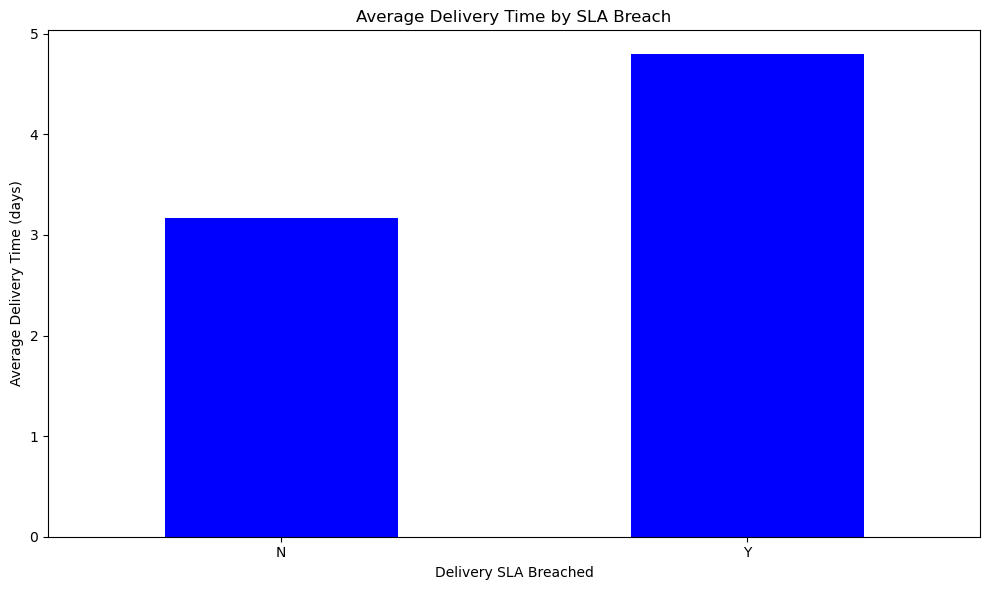

In [29]:
# Delivery Performance Analysis
df2['delivery_time'] = (df2['order_delivery_date'] - df2['order_date']).dt.days
avg_delivery_time = df2.groupby('delivery_sla_breached')['delivery_time'].mean()

plt.figure(figsize=(10, 6))
avg_delivery_time.plot(kind='bar', color='blue')
plt.title('Average Delivery Time by SLA Breach')
plt.xlabel('Delivery SLA Breached')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


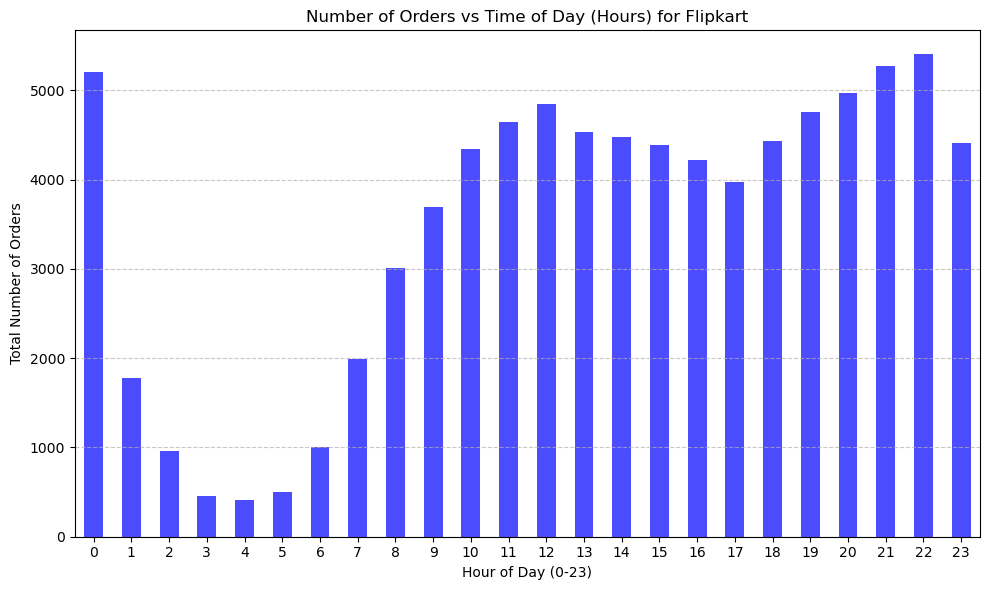

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'order_date' is in datetime format
df2['order_date'] = pd.to_datetime(df2['order_date'])

# Extract the hour from 'order_date'
df2['hour'] = df2['order_date'].dt.hour

# Calculate the number of orders by hour
orders_by_hour = df2.groupby('hour').size()

# Plot Number of Orders vs Time (Hours)
plt.figure(figsize=(10, 6))
orders_by_hour.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of Orders vs Time of Day (Hours) for Flipkart')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Total Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


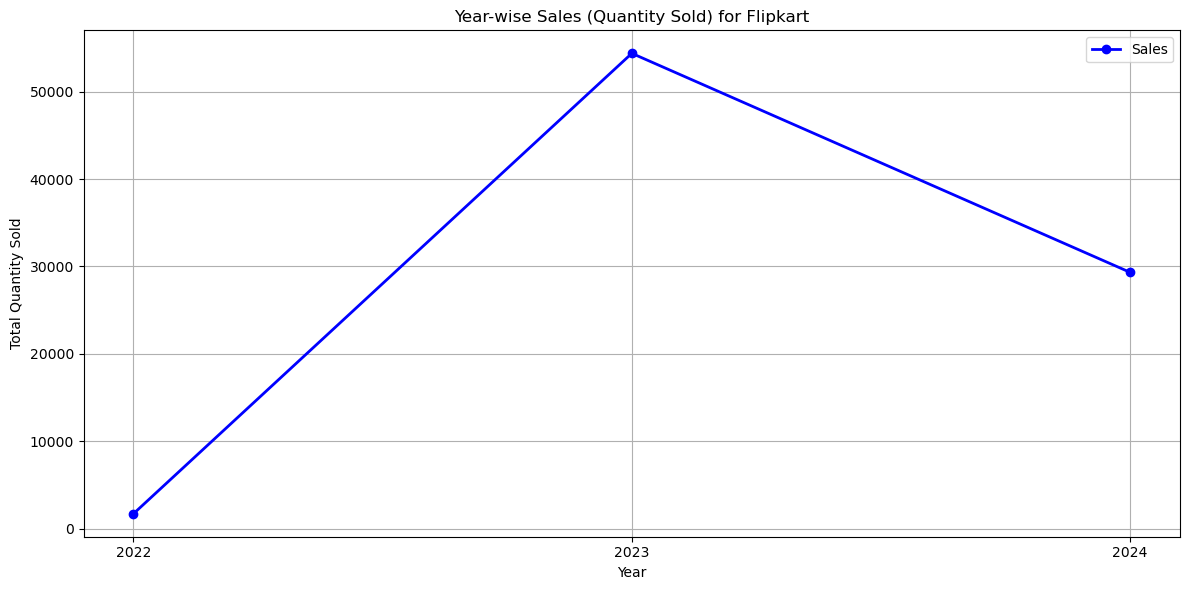

In [29]:
# Step 1: Calculate Year-Wise Sales
# Extract the year from 'order_date'
df2['year'] = df2['order_date'].dt.year

# Calculate total sales (quantity sold) by year
yearly_sales = df2.groupby('year')['order_quantity'].sum()

# Plot Year-wise Sales
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index, yearly_sales, marker='o', color='blue', label='Sales', linewidth=2)
plt.title('Year-wise Sales (Quantity Sold) for Flipkart')
plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')
plt.xticks(yearly_sales.index)  # Ensure all years are shown
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

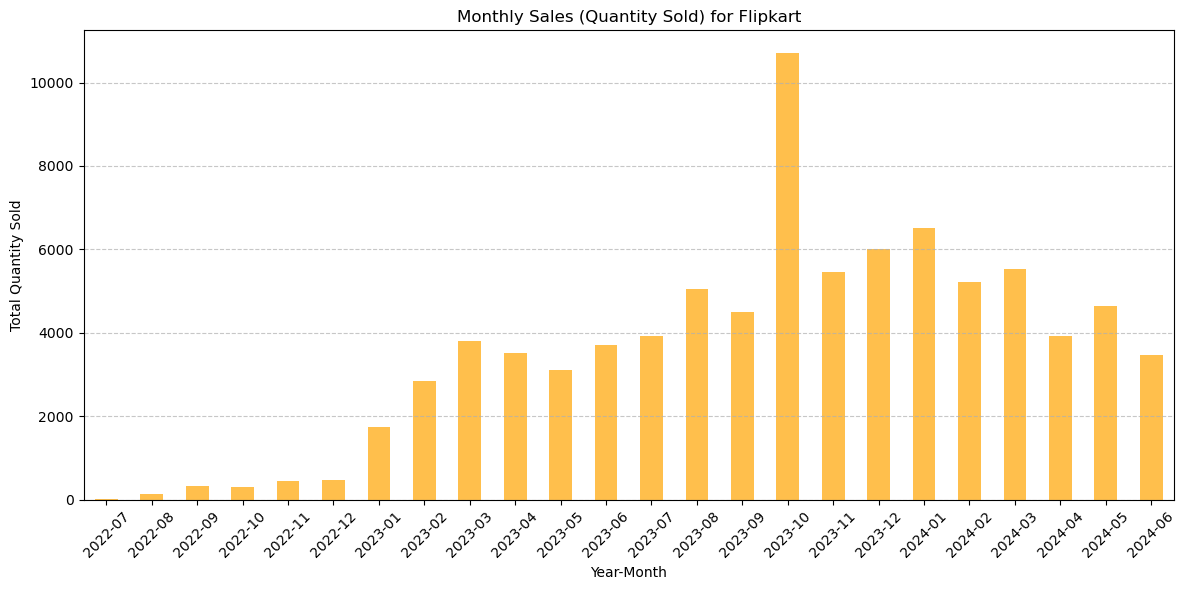

In [31]:
df2['month'] = df2['order_date'].dt.month
df2['year_month'] = df2['order_date'].dt.to_period('M')  # Create a period for year-month

# Calculate total sales (quantity sold) by month
monthly_sales = df2.groupby('year_month')['order_quantity'].sum()

# Plot Monthly Sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Monthly Sales (Quantity Sold) for Flipkart')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

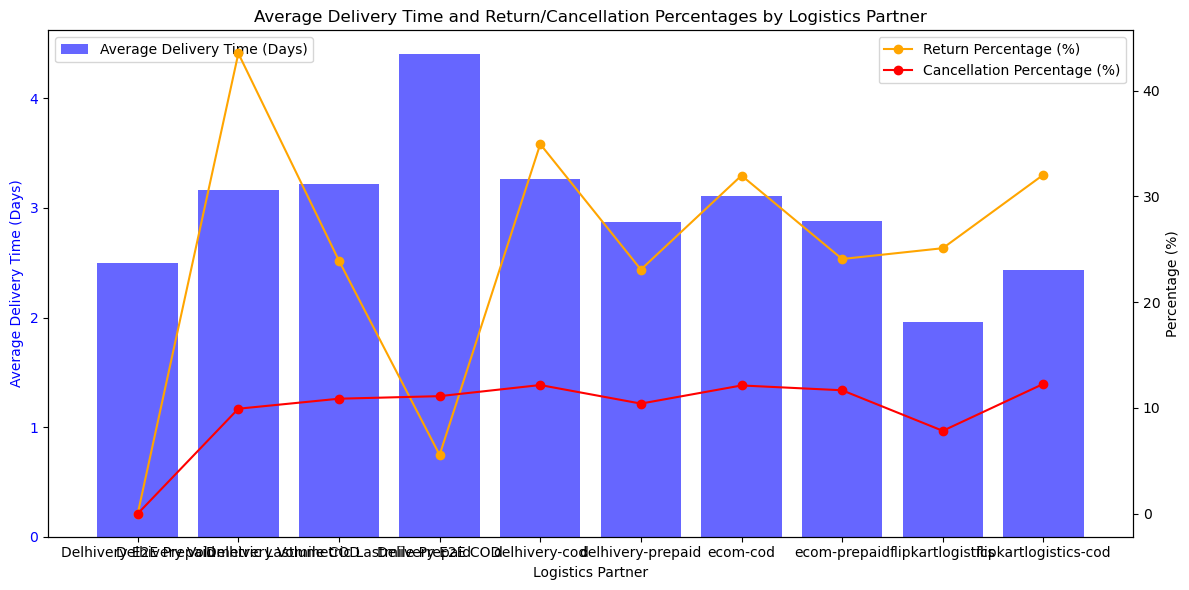

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date columns are in datetime format
df2['order_delivery_date'] = pd.to_datetime(df2['order_delivery_date'])
df2['dispatch_by_date'] = pd.to_datetime(df2['dispatch_by_date'])

# Calculate delivery time (in days)
df2['delivery_time'] = (df2['order_delivery_date'] - df2['dispatch_by_date']).dt.days

# Calculate average delivery time by logistics partner
average_delivery_time = df2.groupby('pickup_logistics_partner')['delivery_time'].mean().reset_index(name='average_delivery_time')

# Calculate total orders by partner
total_orders = df2.groupby('pickup_logistics_partner').size()

# Calculate cancelled and returned orders
cancelled_orders = df2[df2['order_item_status'] == 'CANCELLED'].groupby('pickup_logistics_partner').size()
returned_orders = df2[df2['order_item_status'] == 'RETURNED'].groupby('pickup_logistics_partner').size()

# Calculate return and cancellation percentages
return_percentage = (returned_orders / total_orders * 100).fillna(0).reset_index(name='return_percentage')
cancellation_percentage = (cancelled_orders / total_orders * 100).fillna(0).reset_index(name='cancellation_percentage')

# Merge dataframes to combine average delivery time, return percentage, and cancellation percentage
combined_data = average_delivery_time.merge(return_percentage, on='pickup_logistics_partner').merge(cancellation_percentage, on='pickup_logistics_partner')

# Plotting Average Delivery Time and Return/Cancellation Percentages
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average delivery time
ax1.bar(combined_data['pickup_logistics_partner'], combined_data['average_delivery_time'], color='blue', alpha=0.6, label='Average Delivery Time (Days)')
ax1.set_xlabel('Logistics Partner')
ax1.set_ylabel('Average Delivery Time (Days)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the return and cancellation percentages
ax2 = ax1.twinx()
ax2.plot(combined_data['pickup_logistics_partner'], combined_data['return_percentage'], color='orange', marker='o', label='Return Percentage (%)')
ax2.plot(combined_data['pickup_logistics_partner'], combined_data['cancellation_percentage'], color='red', marker='o', label='Cancellation Percentage (%)')
ax2.set_ylabel('Percentage (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adding titles and legends
plt.title('Average Delivery Time and Return/Cancellation Percentages by Logistics Partner')
fig.tight_layout()  # Adjust layout to prevent clipping of ylabel
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()



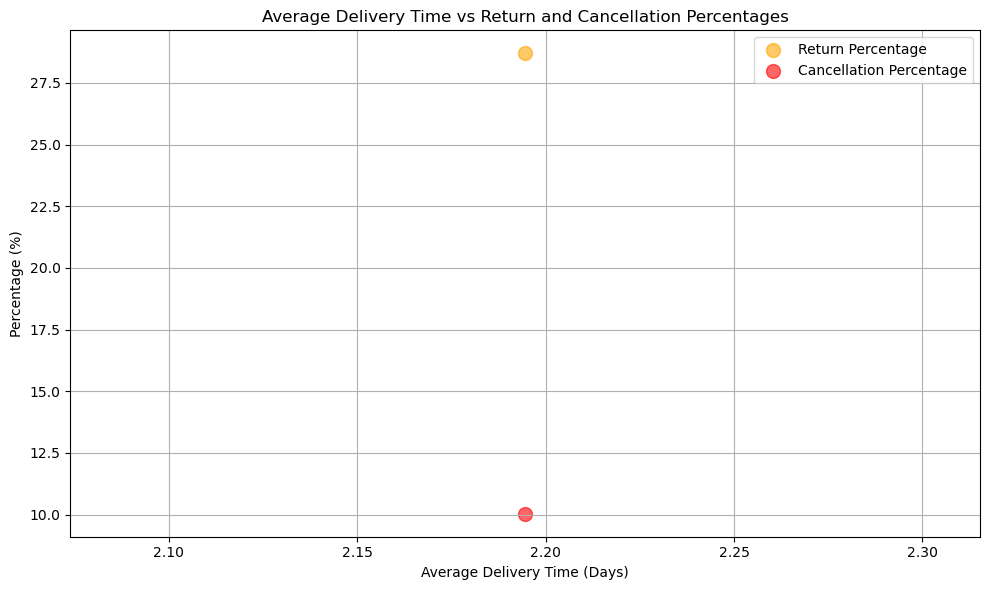

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date columns are in datetime format
df2['order_delivery_date'] = pd.to_datetime(df2['order_delivery_date'])
df2['dispatch_by_date'] = pd.to_datetime(df2['dispatch_by_date'])

# Calculate delivery time (in days)
df2['delivery_time'] = (df2['order_delivery_date'] - df2['dispatch_by_date']).dt.days

# Calculate average delivery time
average_delivery_time = df2['delivery_time'].mean()

# Calculate total orders
total_orders = df2.shape[0]

# Calculate cancelled orders
cancelled_orders = df2[df2['order_item_status'] == 'CANCELLED'].shape[0]

# Calculate returned orders
returned_orders = df2[df2['order_item_status'] == 'RETURNED'].shape[0]

# Calculate return percentage and cancellation percentage
return_percentage = (returned_orders / total_orders) * 100
cancellation_percentage = (cancelled_orders / total_orders) * 100

# Prepare data for plotting
data = {
    'average_delivery_time': [average_delivery_time],
    'return_percentage': [return_percentage],
    'cancellation_percentage': [cancellation_percentage]
}

# Create a DataFrame
plot_data = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for Return Percentage
plt.scatter(plot_data['average_delivery_time'], plot_data['return_percentage'], color='orange', s=100, label='Return Percentage', alpha=0.6)

# Scatter plot for Cancellation Percentage
plt.scatter(plot_data['average_delivery_time'], plot_data['cancellation_percentage'], color='red', s=100, label='Cancellation Percentage', alpha=0.6)

# Adding labels and title
plt.title('Average Delivery Time vs Return and Cancellation Percentages')
plt.xlabel('Average Delivery Time (Days)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


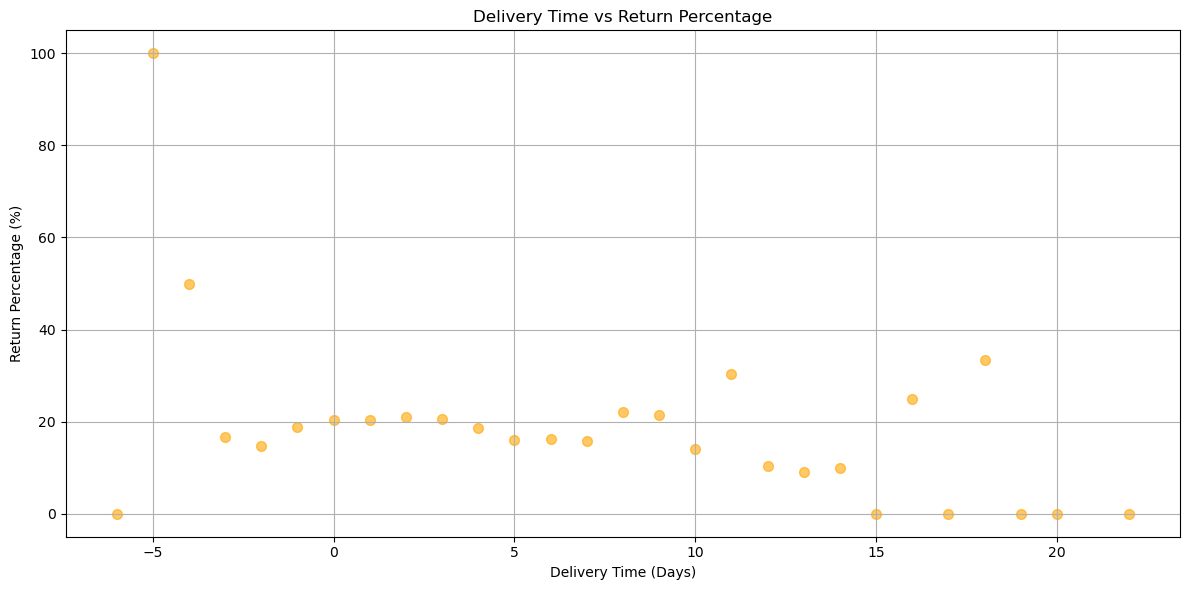

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date columns are in datetime format
df2['order_delivery_date'] = pd.to_datetime(df2['order_delivery_date'])
df2['dispatch_by_date'] = pd.to_datetime(df2['dispatch_by_date'])

# Calculate delivery time (in days)
df2['delivery_time'] = (df2['order_delivery_date'] - df2['dispatch_by_date']).dt.days

# Calculate total orders
total_orders = df2.shape[0]

# Calculate cancelled orders
cancelled_orders = df2[df2['order_item_status'] == 'CANCELLED'].shape[0]

# Calculate returned orders
returned_orders = df2[df2['order_item_status'] == 'RETURNED'].shape[0]

# Calculate return percentage and cancellation percentage
df2['return_percentage'] = (df2['order_item_status'] == 'RETURNED').astype(int) * 100
df2['cancellation_percentage'] = (df2['order_item_status'] == 'CANCELLED').astype(int) * 100

# Aggregate return and cancellation percentages by delivery time
return_percentage_by_delivery_time = df2.groupby('delivery_time')['return_percentage'].mean().reset_index()
cancellation_percentage_by_delivery_time = df2.groupby('delivery_time')['cancellation_percentage'].mean().reset_index()

# Plot 1: Delivery Time vs Return Percentage
plt.figure(figsize=(12, 6))
plt.scatter(return_percentage_by_delivery_time['delivery_time'], return_percentage_by_delivery_time['return_percentage'], color='orange', s=50, alpha=0.6)
plt.title('Delivery Time vs Return Percentage')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Return Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

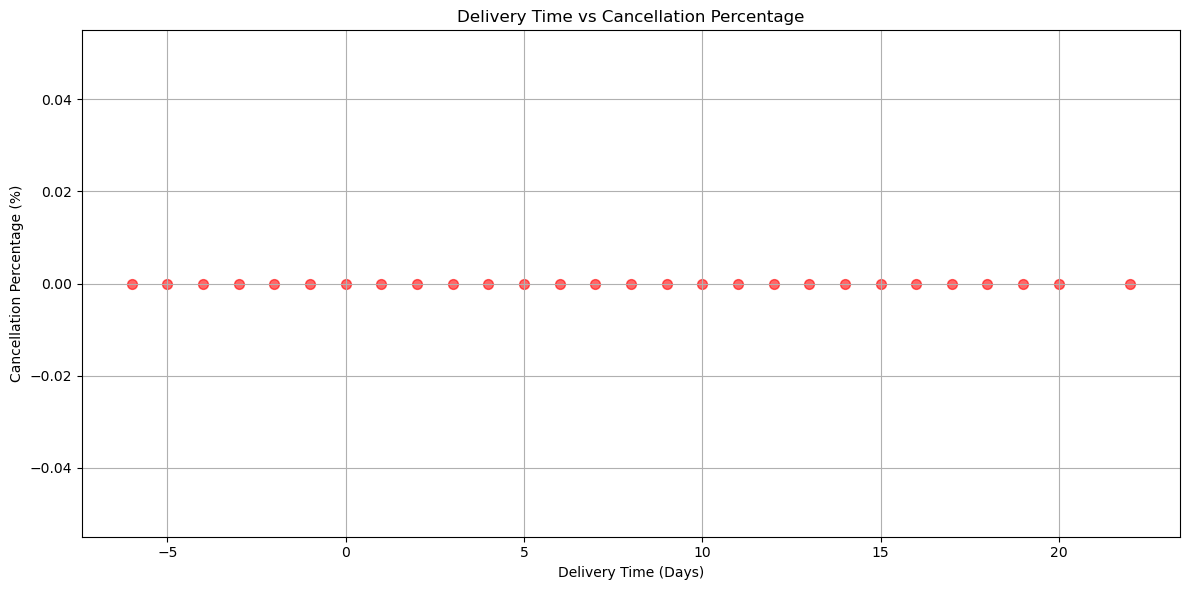

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(cancellation_percentage_by_delivery_time['delivery_time'], cancellation_percentage_by_delivery_time['cancellation_percentage'], color='red', s=50, alpha=0.6)
plt.title('Delivery Time vs Cancellation Percentage')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Cancellation Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

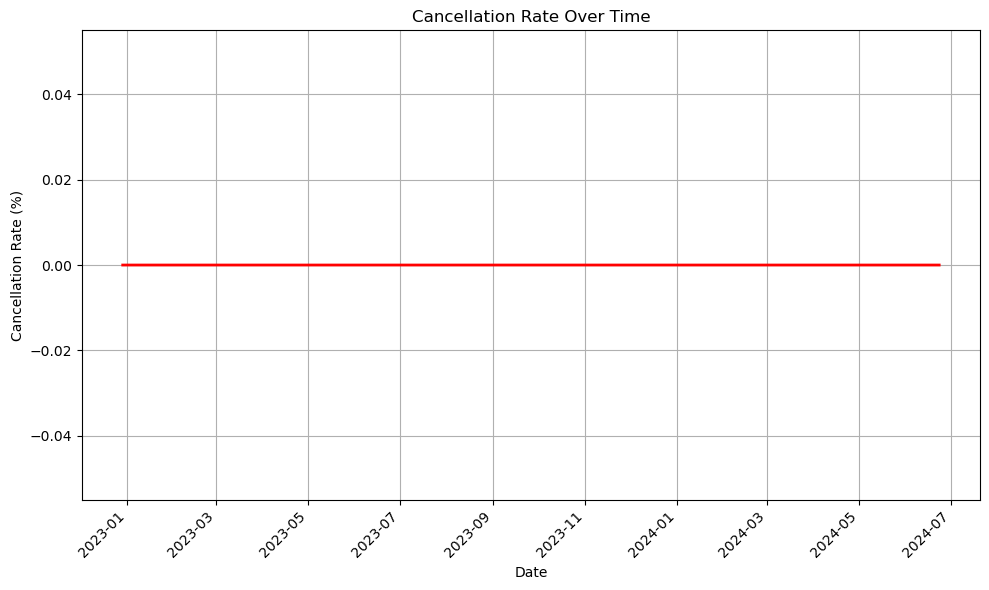

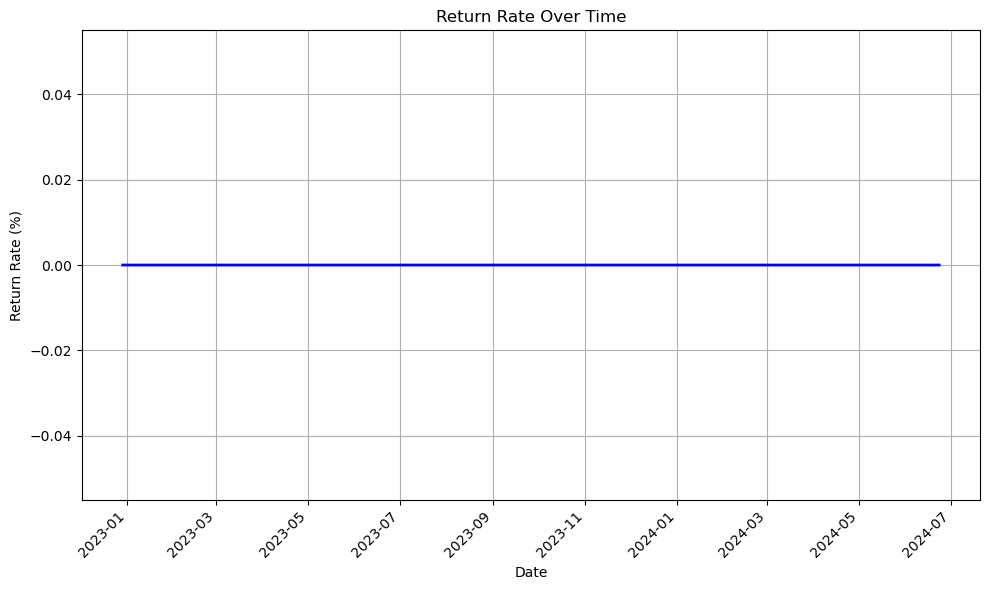

In [31]:
# Cancellation and Return Rates over Time
cancelled_orders = df2[df2['order_item_status'] == 'Cancelled'].groupby('order_date').size()
returned_orders = df2[df2['order_item_status'] == 'Returned'].groupby('order_date').size()
total_orders = df2.groupby('order_date').size()

cancellation_rate = (cancelled_orders / total_orders).fillna(0) * 100
return_rate = (returned_orders / total_orders).fillna(0) * 100

# Plot Cancellation Rate
plt.figure(figsize=(10, 6))
cancellation_rate.plot(color='red', linewidth=2)
plt.title('Cancellation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Return Rate
plt.figure(figsize=(10, 6))
return_rate.plot(color='blue', linewidth=2)
plt.title('Return Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Return Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
# Average Order Value (AOV) over Time
df2['revenue'] = df2['order_quantity'] * (df2['item_price'] + df2['shipping_price'])
aov_per_month = df2.groupby(df2['order_date'].dt.to_period('M'))['revenue'].mean()

plt.figure(figsize=(10, 6))
aov_per_month.plot(kind='line', color='purple', marker='o')
plt.title('Average Order Value (AOV) vs Month')
plt.xlabel('Month')
plt.ylabel('Average Order Value (in ₹)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'item_price'

In [35]:
# Logistics Partner Performance
logistics_performance = df2.groupby('pickup_logistics_partner').agg(
    avg_delivery_time=('delivery_time', 'mean'),
    sla_breach_count=('delivery_sla_breached', 'sum')
)

plt.figure(figsize=(10, 6))
logistics_performance['avg_delivery_time'].plot(kind='bar', color='green')
plt.title('Average Delivery Time by Logistics Partner')
plt.xlabel('Logistics Partner')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/mj/r3dfln1d2zjb146r3_q0z8yc0000gn/T/ipykernel_121/1669307553.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  logistics_performance = df2.groupby('pickup_logistics_partner').agg(


TypeError: category type does not support sum operations

/var/folders/mj/r3dfln1d2zjb146r3_q0z8yc0000gn/T/ipykernel_121/2778423822.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dispatch_sla_breach = df2.groupby('dispatch_sla_breached')['order_quantity'].sum()


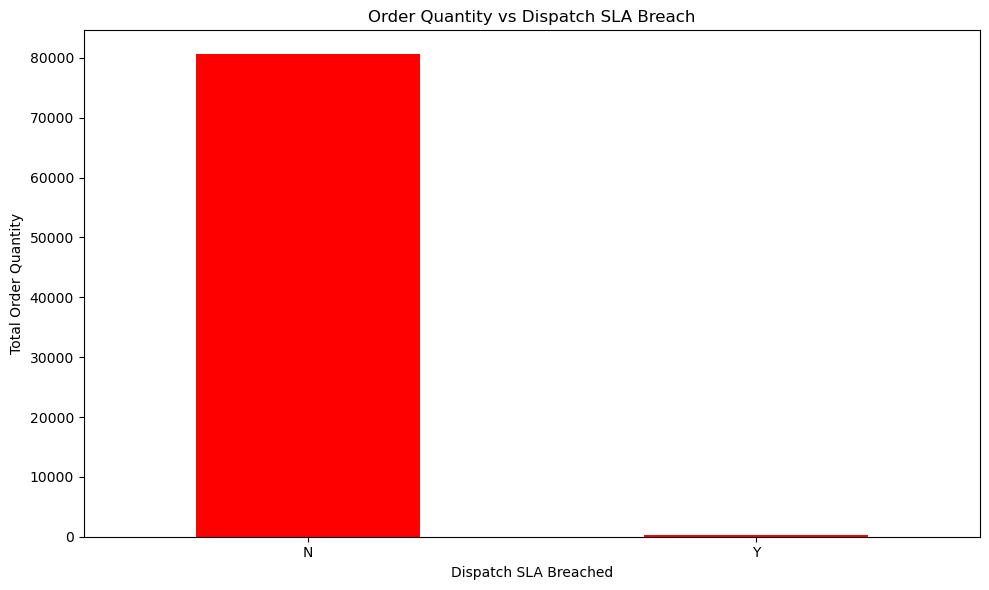

In [37]:
# Dispatch SLA Breach Analysis
dispatch_sla_breach = df2.groupby('dispatch_sla_breached')['order_quantity'].sum()

plt.figure(figsize=(10, 6))
dispatch_sla_breach.plot(kind='bar', color='red')
plt.title('Order Quantity vs Dispatch SLA Breach')
plt.xlabel('Dispatch SLA Breached')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [39]:
# Seller Pickup Reattempts Analysis
reattempts_analysis = df2.groupby('seller_pickup_reattempts').agg(
    avg_delivery_time=('delivery_time', 'mean'),
    sla_breach_count=('delivery_sla_breached', 'sum')
)

plt.figure(figsize=(10, 6))
reattempts_analysis['avg_delivery_time'].plot(kind='bar', color='darkblue')
plt.title('Average Delivery Time by Seller Pickup Reattempts')
plt.xlabel('Seller Pickup Reattempts')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/mj/r3dfln1d2zjb146r3_q0z8yc0000gn/T/ipykernel_121/4144737595.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reattempts_analysis = df2.groupby('seller_pickup_reattempts').agg(


TypeError: category type does not support sum operations